<a href="https://colab.research.google.com/github/ma7moud09/-Heart-Fail-Analysis-and-Quick-prediction/blob/main/Heart-Fail-Analysis-and-Quick-prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import missingno
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from mlxtend.plotting import plot_confusion_matrix

# Explore the data

In [166]:
path = "/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1


Sex - Gender of patient Male = 1, Female =0

ge - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes

In [167]:
df.drop(df.index[0],axis = 0, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [168]:
headres = ['age', 'anaemia','creatinine_phosphokinase', 'diabetes',
           'ejection_fraction', 'high_blood_pressure','platelets',
           'serum_creatinine', 'serum_sodium', 'sex','smoking', 
           'time', 'DEATH_EVENT' ]
df.columns = headres
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [169]:
df.describe(include = 'all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299,299,299,299,299,299,299,299,299,299,299,299,299
unique,47,2,208,2,17,2,176,40,27,2,2,148,2
top,60,0,582,0,35,0,263358.03,1,136,1,0,187,0
freq,33,170,47,174,49,194,25,50,40,194,203,7,203


In [170]:
df.isnull().sum().to_frame()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


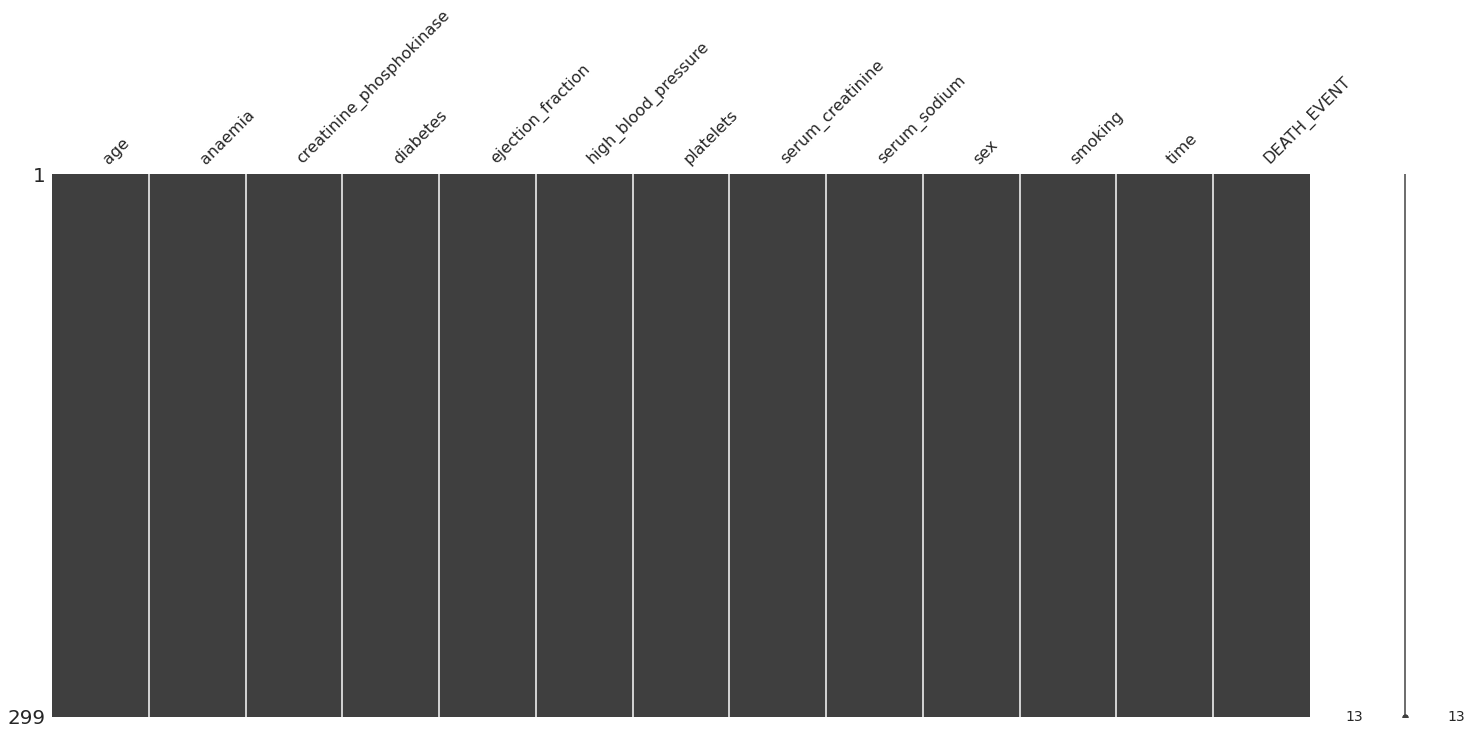

In [171]:
missingno.matrix(df)

In [172]:
df.dtypes

age                         object
anaemia                     object
creatinine_phosphokinase    object
diabetes                    object
ejection_fraction           object
high_blood_pressure         object
platelets                   object
serum_creatinine            object
serum_sodium                object
sex                         object
smoking                     object
time                        object
DEATH_EVENT                 object
dtype: object

In [173]:
df = df.astype(float)
df.dtypes

age                         float64
anaemia                     float64
creatinine_phosphokinase    float64
diabetes                    float64
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                         float64
smoking                     float64
time                        float64
DEATH_EVENT                 float64
dtype: object

In [174]:
df.shape

(299, 13)

# How many mamle(1) Vs female(0)?

Text(0, 0.5, 'sum of mamle(1) / female(0)')

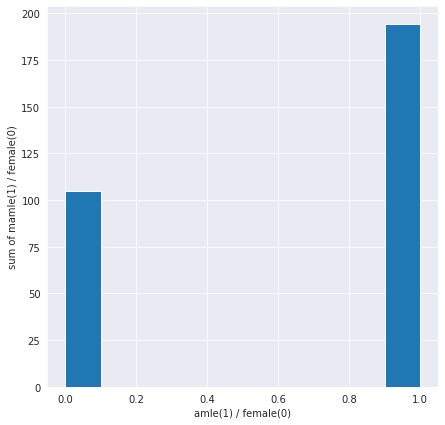

In [175]:
plt.figure(figsize=(7,7))
plt.hist(df['sex'])
plt.title=('How many mamle(1) Vs female(0)')
plt.xlabel('amle(1) / female(0)')
plt.ylabel('sum of mamle(1) / female(0)')

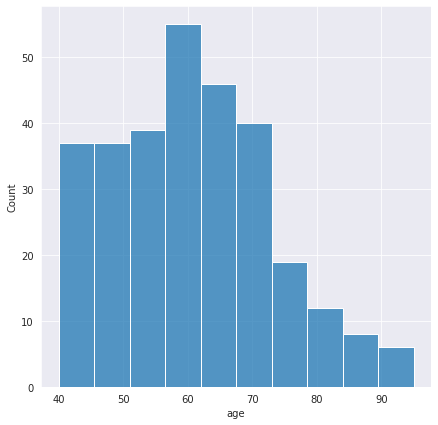

In [176]:
plt.figure(figsize=(7,7))
sns.histplot(df['age'],)

Age wise 40 to 80 the spread is High

less than 40 age and higher than 80 age people are very low

In [177]:
fig = px.box(df, x='sex', y='age', points="all")
fig.update_layout(title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()


# Is Age and Sexsmoking an indicator for Death Event?


In [178]:
fig = px.violin(df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

In [179]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

# Is Smoking and Sex an indicator for Death Event?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



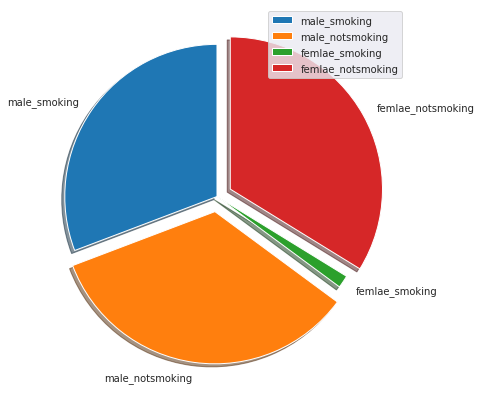

In [180]:
male = df[df['sex'] ==1.0]
female = df[df['sex']==0]

male_smoking = male[male['smoking'] == 1]
male_notsmoking = male[male['smoking'] == 0]

femlae_smoking = female[female['smoking'] == 1]
femlae_notsmoking = female[female['smoking'] == 0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]

female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels_smoking  = ['male_smoking','male_notsmoking',
          'femlae_smoking', 'femlae_notsmoking']
values_smoking = [len(male_smoking), len(male_notsmoking ),
          len(femlae_smoking), len(femlae_notsmoking)]



explod = [0, 0.1, 0, 0.1]

plt.figure(figsize=(7,7))


plt.pie(labels= labels_smoking , x = values_smoking,
        explode = explod, startangle = 90, shadow = True)
plt.title=("Analysis on smoking - Genden")


plt.legend()


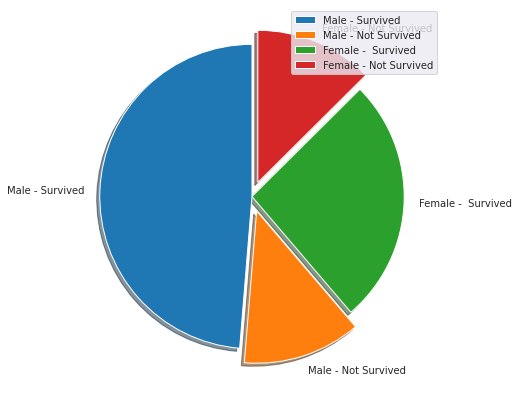

In [181]:
values_death = [len(male_survi),len(female_not),
         len(female_survi),len(female_not)]

labels_death = ['Male - Survived','Male - Not Survived', 
          "Female -  Survived", "Female - Not Survived"]

plt.figure(figsize=(7,7))
plt.pie(labels= labels_death , x = values_death,explode = explod,
        startangle = 90, shadow = True)

plt.title = ("Analysis on Survival - Gender")
plt.legend()


# Is Relationshipe between age and anaemia?

In [182]:
df.groupby(['anaemia'])['age'].value_counts()

anaemia  age 
0.0      70.0    19
         60.0    16
         45.0    15
         50.0    15
         65.0    15
                 ..
1.0      62.0     1
         64.0     1
         78.0     1
         79.0     1
         87.0     1
Name: age, Length: 74, dtype: int64

In [183]:
anaemia = df[df["anaemia"]==0]["age"]
not_anaemia = df[df["anaemia"]==1]["age"]

hist_data = [anaemia,not_anaemia]

anaemia_labels = ['anaemia', 'Not anaemia']

fig = ff.create_distplot(hist_data,group_labels = anaemia_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on anaemia Status")
fig.show()

In [184]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels_anaemia= ['No anaemia Male','anaemia Male','No anaemia Female','anaemia Female']
anaemia_Female = anaemia_yes[anaemia_yes['sex']==0]
notanaemia_Female= anaemia_no[anaemia_no['sex']==0]
anaemia_male = anaemia_yes[anaemia_yes['sex']==1]
notanaemia_male = anaemia_no[anaemia_no['sex']==1]
values_anaemia = [len(anaemia_Female), len(notanaemia_Female),
          len(anaemia_male), len(notanaemia_male)]
          
fig = go.Figure(data=[go.Pie(labels=labels_anaemia, 
                             values=values_anaemia, hole=.4)])
fig.update_layout(
    title_text="Analysis on vanaemia accroding to sex")
fig.show()

# Is Relationshipe between age and diabetes?

In [185]:
df.groupby('diabetes')['age'].value_counts().to_frame()

age
diabetes age      
0.0      70.0   16
         50.0   15
         60.0   14
         55.0   13
         65.0   11
...            ...
1.0      66.0    1
         69.0    1
         73.0    1
         90.0    1
         94.0    1

[75 rows x 1 columns]

In [186]:
diabetes = df[df["diabetes"]==0]["age"]
diabetes = df[df["diabetes"]==1]["age"]

hist_data = [anaemia,not_anaemia]

diabetes_labels = ['diabetes', 'Not diabetes']

fig = ff.create_distplot(hist_data,group_labels = diabetes_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Diabetes Status")
fig.show()

In [187]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [188]:
labels_diabetes= ['No Diabetes Male','Diabetes Male','No Diabetes Female','Diabetes Female']
diabetes_Female = diabetes_yes[diabetes_yes['sex']==0]
notdiabetes_Female= diabetes_no[diabetes_no['sex']==0]
diabetes_male = diabetes_yes[diabetes_yes['sex']==1]
notdiabetes_male = diabetes_no[diabetes_no['sex']==1]
values_diabetes = [len(diabetes_Female), len(notdiabetes_Female),
          len(diabetes_male), len(notdiabetes_male)]
          
fig = go.Figure(data=[go.Pie(labels=labels_diabetes, 
                             values=values_diabetes, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

# Is Relationshipe between age and High blood Pressure (HBP)?


In [189]:
nothigh_blood_pressure = df[df["high_blood_pressure"]==0]["age"]
high_blood_pressure = df[df["high_blood_pressure"]==1]["age"]

hist_data = [high_blood_pressure,nothigh_blood_pressure]

high_blood_pressure_labels = ['high_blood_pressure', 'Not high_blood_pressure']

fig = ff.create_distplot(hist_data,group_labels = high_blood_pressure_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on high_blood_pressure Status")
fig.show()

In [190]:
labels = ['No high_blood_pressure','high_blood_pressure']
high_blood_pressure_yes = df[df['high_blood_pressure']==1]
high_blood_pressure_no = df[df['high_blood_pressure']==0]
values_high_blood_pressure = [len(high_blood_pressure_no), len(high_blood_pressure_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on high_blood_pressure")
fig.show()

In [191]:
labels_high_blood_pressure= ['No high_blood_pressure Male','high_blood_pressure Male',
                             'high_blood_pressure Female','high_blood_pressure Female']
high_blood_pressure_Female = diabetes_yes[diabetes_yes['sex']==0]
nothigh_blood_pressure_Female= diabetes_no[diabetes_no['sex']==0]
high_blood_pressure_male = diabetes_yes[diabetes_yes['sex']==1]
nothigh_blood_pressure_male = diabetes_no[diabetes_no['sex']==1]
values_high_blood_pressure = [len(high_blood_pressure_Female), len(nothigh_blood_pressure_Female),
          len(high_blood_pressure_male), len(nothigh_blood_pressure_male)]
          
fig = go.Figure(data=[go.Pie(labels=labels_high_blood_pressure, 
                             values=values_high_blood_pressure, hole=.4)])
fig.update_layout(
    title_text="Analysis on high_blood_pressure due to sex")
fig.show()

# Is Relationshipe between Death and ejection_fraction?


In [192]:
ejection_fraction = df[df["DEATH_EVENT"]==0]["ejection_fraction"]
notejection_fraction = df[df["DEATH_EVENT"]==1]["ejection_fraction"]

hist_data = [ejection_fraction,notejection_fraction]

ejection_fraction_labels = ['ejection_fraction', 'Not ejection_fraction']

fig = ff.create_distplot(hist_data,group_labels = ejection_fraction_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in DEATH_EVENT onejection_fraction_labels Status")
fig.show()

# Heatmap

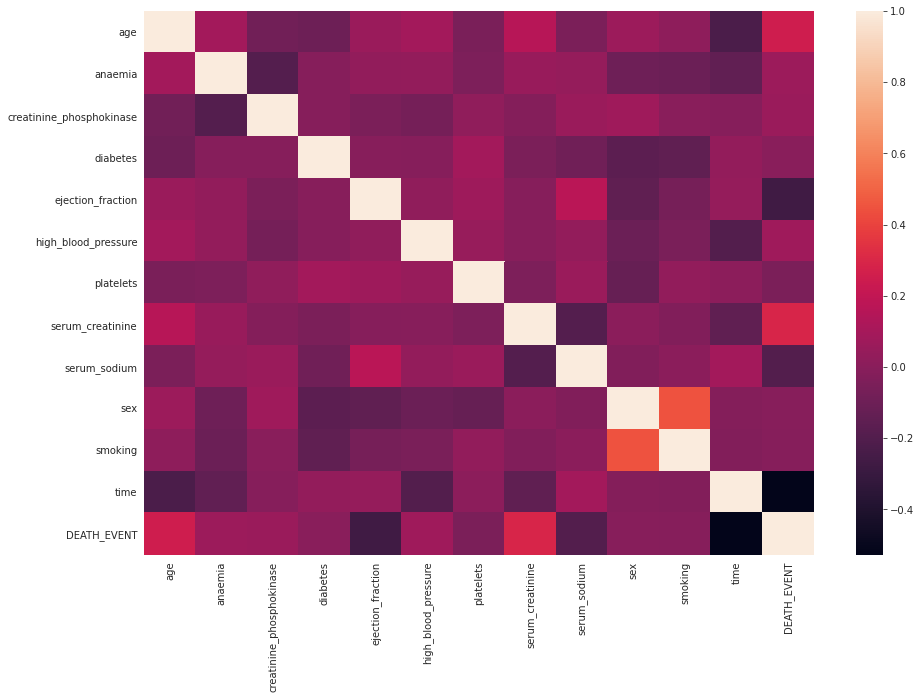

In [193]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

# Data Modeling


Train Test Split

In [194]:
x = df[['time','ejection_fraction','serum_creatinine']]
y = df['DEATH_EVENT']
x.head()

,time,ejection_fraction,serum_creatinine
1,4.0,20.0,1.9
2,6.0,38.0,1.1
3,7.0,20.0,1.3
4,7.0,20.0,1.9
5,8.0,20.0,2.7


In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 2)

In [196]:
accuracy_list = []

Logistic Regression


In [197]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR_predict = log_reg.predict(x_test)
LR_accurcy = accuracy_score(y_test, LR_predict)
accuracy_list.append(100*LR_accurcy)

In [198]:
print( "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* LR_accurcy))

Accuracy of Logistic Regression is :  90.00%


<Figure size 1440x576 with 0 Axes>

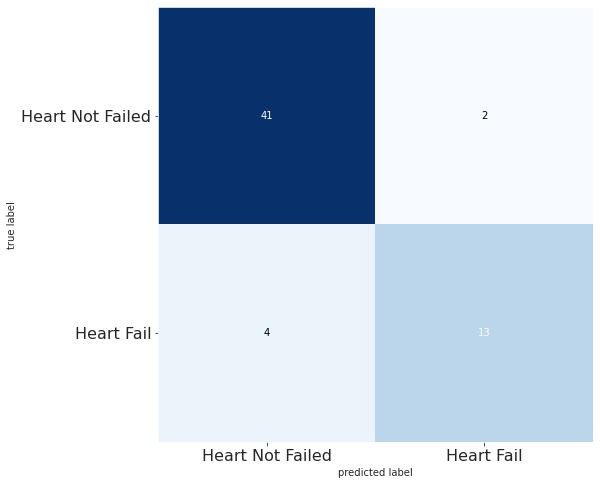

In [199]:
cm_LR = confusion_matrix(y_test, LR_predict)
plt.figure()
plot_confusion_matrix(cm_LR, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title = ("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

 KNeighbors

In [200]:
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
KN_predict = KN.predict(x_test)
KN_acc = accuracy_score(KN_predict, y_test)
accuracy_list.append(100*KN_acc)


In [201]:
print('Accuracy of  KNeighbors Classifier :','{:.2f}%'.format(100*KN_acc))

Accuracy of  KNeighbors Classifier : 91.67%


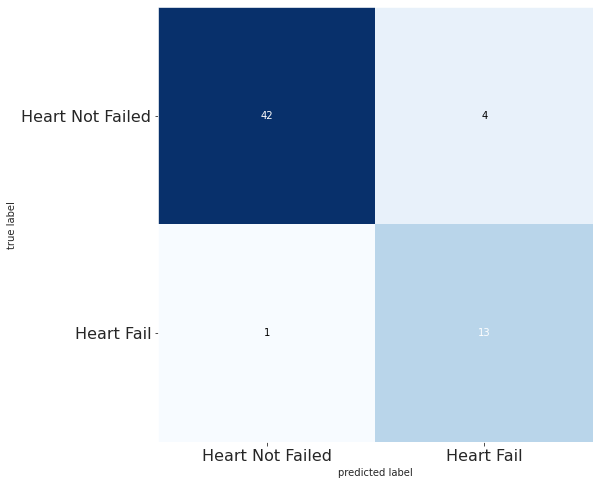

In [202]:
cm_KN = confusion_matrix(KN_predict, y_test)
plot_confusion_matrix(cm_KN, figsize=(12,8), cmap= plt.cm.Blues, hide_ticks=True)
plt.title = ("KNeighbors Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

Support Vector Machine 

In [203]:
SVM = SVC()
SVM.fit(x_train, y_train)
svm_predict = SVM.predict(x_test)
svm_acc = accuracy_score(svm_predict,y_test)
accuracy_list.append(100*svm_acc)


In [204]:
print('Accuracy of Support Vector Machine :' + '{:.2f}%'.format(100*svm_acc))

Accuracy of Support Vector Machine :90.00%


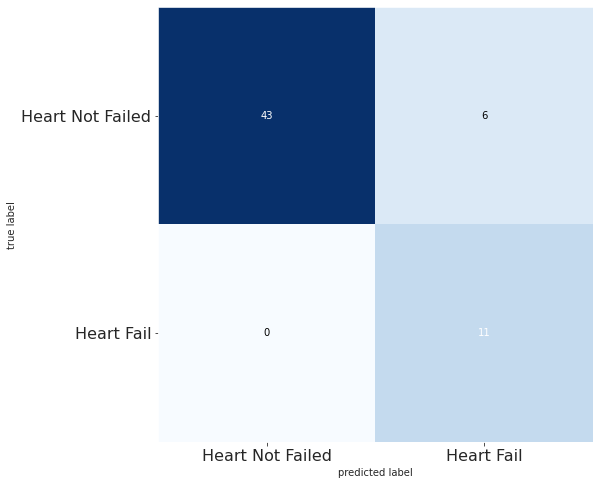

In [205]:
cm_svm = confusion_matrix(svm_predict, y_test)
plot_confusion_matrix(cm_svm, figsize=(12,8), cmap= plt.cm.Blues, hide_ticks=True)
plt.title = ("Support Vector Machin Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

Decision Tree

In [206]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_predict = DT.predict(x_test)
DT_acc = accuracy_score(DT_predict, y_test)
accuracy_list.append(100*DT_acc)

In [207]:
print('Accuracy of Decision Tree :' + '{:.2f}%'.format(100*DT_acc))

Accuracy of Decision Tree :85.00%


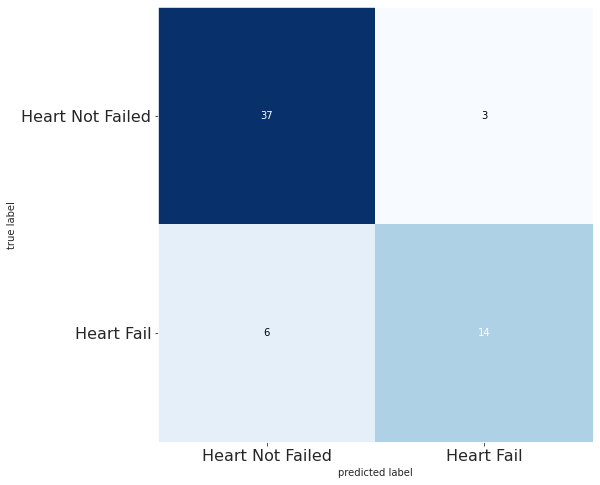

In [208]:
cm_DT = confusion_matrix(DT_predict, y_test)
plot_confusion_matrix(cm_DT, figsize=(12,8), cmap= plt.cm.Blues, hide_ticks=True)
plt.title = (" Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

KNeighborsClassifier: 91.67%

DecisionTreeClassifier: 90.00%

SVC: 90.00%

Logistic Regression: 90.00%